# Singular Value Decomposition (SVD)

### Remembering...

$$ 
\begin{align}
C(AA^T) = C(A) \\
R(A^TA) = R(A) 
\end{align}
$$

# $$ A = U \Sigma V^T $$
- A = (m x n)  
- U = Orthogonal basis for column space of A (m x m)
- Sum = Singular values of A( m x n)
- V^T = Orthgonal basis for row space of A(n x n)

$$ 
\begin{align}
A &= U \Sigma V^T \\
A^TA &= (U \Sigma V^T )^T U \Sigma V^T \\
A^TA &= V^{TT} \Sigma^{T} U^T U \Sigma V^T \\
A^TA &= V \Sigma^T I \Sigma V^T \\
A^TA &= V \Sigma^2 V^T \\
\end{align}
$$


## Compute U

$$ 
\begin{align}
A &= U \Sigma V^T \\
AA^T &= U \Sigma V^T (U \Sigma V^T)^T \\
AA^T &= U \Sigma V^T V \Sigma^T U^T \\
AA^T &= U \Sigma \Sigma^T U^T \\
AA^T &= U \Sigma^2 U^T
\end{align}
$$

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
# the matrix 
A = [[3, 0, 5], [ 8, 1, 3]]

#Note differences from matlab: S is vector, V is V'

U,S,V = np.linalg.svd(A)
print(U), print(' ')
print(S), print(' ')
print(V), print(' ')

[[-0.52138438  0.85332193]
 [-0.85332193 -0.52138438]]
 
[9.89086518 3.18916698]
 
[[-0.84833111 -0.08627374 -0.52238986]
 [-0.50518185 -0.16348607  0.84738634]
 [-0.15851066  0.98276607  0.09510639]]
 


(None, None)

<>:13: SyntaxWarning: invalid escape sequence '\S'
<>:13: SyntaxWarning: invalid escape sequence '\S'
C:\Users\kenny\AppData\Local\Temp\ipykernel_25460\1421782242.py:13: SyntaxWarning: invalid escape sequence '\S'
  plt.title('$\Sigma$')


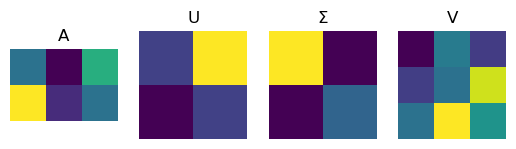

In [12]:
plt.subplot(141)
plt.imshow(A)
plt.title('A')
plt.axis('off')

plt.subplot(142)
plt.imshow(U)
plt.title('U')
plt.axis('off')

plt.subplot(143)
plt.imshow(np.diag(S))
plt.title('$\Sigma$')
plt.axis('off')

plt.subplot(144)
plt.imshow(V)
plt.title('V')
plt.axis('off')

plt.show()

## Challenge

In [14]:
#relationship between eig and SVD for a square symetric matrix?

#create a symmetric matrix
A = np.random.randn(5,5)
A = A.T@A

print(f"Matrix A: \n {A}"), print(' ')
#eig ( W, L) and svd ( U, S, V)
L, W = np.linalg.eig(A)
U, s, V = np.linalg.svd(A)

print(f"Eigenvalues of A: \n L: {L} \n \n W: {W}"), print(' ')

print(f"Singular Values Decomposition of A: \n U: {U} \n \n S: {S} \n \n V: {V}"), print(' ')

Matrix A: 
 [[ 7.31767219  0.76214502  0.68326746 -3.9952627   0.6850135 ]
 [ 0.76214502  4.5240185  -3.81748668 -3.84435019  0.37897857]
 [ 0.68326746 -3.81748668  4.66393423  4.21204881 -0.44899603]
 [-3.9952627  -3.84435019  4.21204881  7.70653036 -0.62311986]
 [ 0.6850135   0.37897857 -0.44899603 -0.62311986  0.68516998]]
 
Eigenvalues of A: 
 L: [14.96192554  7.74159204  1.41363243  0.12025889  0.65991635] 
 
 W: [[-0.37450599 -0.81165497  0.26928621  0.35528003  0.04714344]
 [-0.44052289  0.31451269  0.75937639 -0.29351125 -0.21028549]
 [ 0.42494634 -0.48765912  0.10155314 -0.70799457 -0.26465041]
 [ 0.69263176  0.05656946  0.57609734  0.40249488  0.15221976]
 [-0.0732577  -0.03586713  0.09290448 -0.35265962  0.92754882]]
 
Singular Values Decomposition of A: 
 U: [[-0.37450599  0.81165497 -0.26928621  0.04714344  0.35528003]
 [-0.44052289 -0.31451269 -0.75937639 -0.21028549 -0.29351125]
 [ 0.42494634  0.48765912 -0.10155314 -0.26465041 -0.70799457]
 [ 0.69263176 -0.05656946 -0.5

(None, None)

In [15]:
#  sort eig outputs
sidx = np.argsort(L)[::-1]
L = L[sidx]
W = W[:, sidx]

<>:12: SyntaxWarning: invalid escape sequence '\S'
<>:12: SyntaxWarning: invalid escape sequence '\S'
C:\Users\kenny\AppData\Local\Temp\ipykernel_25460\609894478.py:12: SyntaxWarning: invalid escape sequence '\S'
  ax[1,1].set_title('$\Sigma$ (svd)')


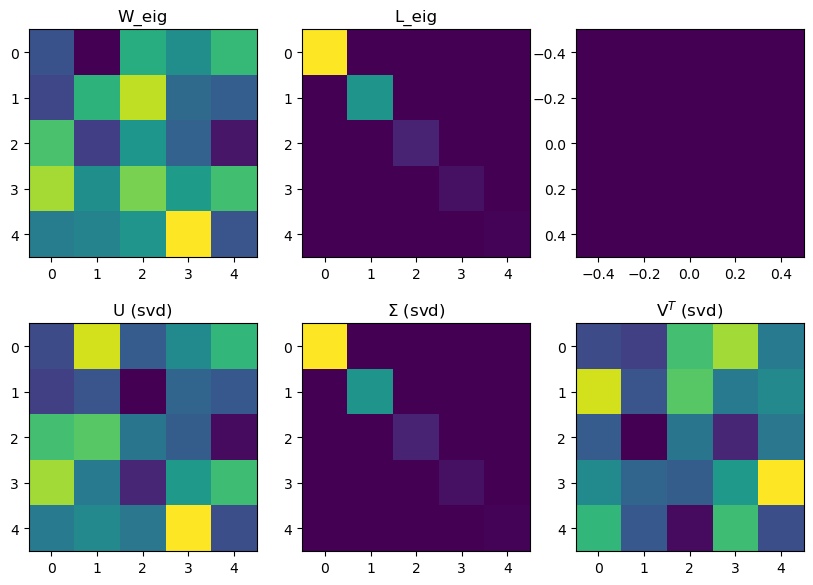

In [16]:
#images of all matrices
fig, ax = plt.subplots(2,3, figsize = (10, 7))
ax[0,0].imshow(W)
ax[0,0].set_title('W_eig')
ax[0,1].imshow(np.diag(L))
ax[0,1].set_title('L_eig')
ax[0,2].imshow(np.zeros((1,1)))

ax[1,0].imshow(U)
ax[1,0].set_title('U (svd)')
ax[1,1].imshow(np.diag(s))
ax[1,1].set_title('$\Sigma$ (svd)')
ax[1,2].imshow(V)
ax[1,2].set_title('V$^T$ (svd)')


plt.show()

#compare U and V, and U and W

In [17]:
#comparing U and V
print(np.round(U-V.T, 4))

[[-0.  0. -0. -0. -0.]
 [ 0.  0.  0.  0. -0.]
 [-0. -0.  0.  0.  0.]
 [-0.  0. -0. -0. -0.]
 [ 0. -0.  0. -0.  0.]]


In [18]:
#comparing U and W
print(np.round(U-W.T, 4))

[[ 0.      1.2522 -0.6942 -0.6455  0.4285]
 [ 0.3711 -0.629  -0.2717 -0.2669 -0.2576]
 [ 0.1557 -0.2717 -0.2031 -0.8407 -0.8009]
 [ 0.6455  0.1537 -0.3114  0.     -0.5251]
 [-0.4285  0.3294  0.6151  0.5251 -0.    ]]


## Relation between singular values and eigenvalues

In [20]:
#Case 1: eig(A'A) vs. svd(A)

A = np.array(([[3,1,0], [1,1,0]]))

print(f'Eigenvalues of A: \n{np.sort(np.linalg.eig(A.T @ A)[0])}\n')
print(f'Singular Values of A: \n{np.sort(np.linalg.svd(A)[1])**2}\n')


Eigenvalues of A: 
[ 0.          0.34314575 11.65685425]

Singular Values of A: 
[ 0.34314575 11.65685425]



In [21]:
#case 2:  eig(A'A) vs. svd(A'A)

print(f'Eigenvalues of ATA: \n{np.sort(np.linalg.eig(A.T @ A)[0])}\n')
print(f'Singular Values of ATA: \n{np.sort(np.linalg.svd(A.T@A)[1])}\n')

Eigenvalues of ATA: 
[ 0.          0.34314575 11.65685425]

Singular Values of ATA: 
[ 0.          0.34314575 11.65685425]



In [22]:
#case 3: eig(A) vs. svd(A), real-valued eigs

#need a square matrix for eig
A = [[3,1,0], [1,1,0], [1,1,1]]
print(f'Eigenvalues of A: \n{np.sort(np.linalg.eig(A)[0])}\n')
print(f'Singular Values of A: \n{np.sort(np.linalg.svd(A)[1])}\n')

#There's no trivial relatioship between them

Eigenvalues of A: 
[0.58578644 1.         3.41421356]

Singular Values of A: 
[0.49384652 1.10038368 3.68039011]



In [23]:
#case 4: eig(A) vs. svd(A), complex eigs

#random matrices are likely to give complex eigenvalues
A = np.random.randn(3,3)

print(f'Eigenvalues of A random: \n{np.sort(np.linalg.eig(A)[0])}\n')
print(f'Singular Values of A random: \n{np.sort(np.linalg.svd(A)[1])}\n')

#There's no trivial relatioship between them

Eigenvalues of A random: 
[0.22288644-1.8531281j 0.22288644+1.8531281j 0.85763281+0.j       ]

Singular Values of A random: 
[0.85287822 1.43898071 2.43448938]



## Challenge

$$ 
\begin{align}
A &= U \Sigma V^T \\
A^TA &= V \Sigma^2 V^T \\
\end{align}
$$

In [25]:
# create a matrix (3x6)
m = 3
n = 6

A = np.random.randn(m, n)
print(f"Matrix A: \n {A}"), print(' ')

#full svd (variables Us, Ss, Vs)
Us, Ss, Vs = np.linalg.svd(A)

print(f"Singular Values Decomposition of A: \n U: {Us} \n \n S: {Ss} \n \n V: {Vs}"), print(' ')



Matrix A: 
 [[ 0.38794306 -0.18217757 -1.73845525  0.61073348  0.12167381  0.61081757]
 [-0.52861802  0.51313366 -0.10257763  0.57883037 -0.4174267   0.38692786]
 [-2.10722398 -0.13793578  0.38332189  0.90840287 -0.66885507  0.36605249]]
 
Singular Values Decomposition of A: 
 U: [[ 0.20262285  0.96224522 -0.18173638]
 [-0.30791631  0.23877835  0.92096278]
 [-0.92958675  0.13064851 -0.34467295]] 
 
 S: [2.61247401 1.99181343 0.63218056] 
 
 V: [[ 0.84219928 -0.0255284  -0.25913995 -0.34408841  0.29663269 -0.12848103]
 [-0.01417394 -0.03554319 -0.82700173  0.42402014 -0.03513247  0.36548126]
 [ 0.26726891  0.87511079  0.14133574  0.17239829 -0.27841852  0.18850626]
 [ 0.32953978 -0.21479278  0.3521901   0.80649914  0.23527205 -0.12424142]
 [-0.31248236  0.3823612  -0.0528091  -0.00195792  0.86792044 -0.00872712]
 [ 0.11324801 -0.19982509  0.31954995 -0.14711976  0.15690461  0.89379493]]
 


(None, None)

In [26]:
#eig of A'A
L,V = np.linalg.eig(A.T@A)
print(f"Eigenvalues of A: \n L: {L} \n \n Eigenvector of A: {V}"), print(' ')

#sort eigensolution
sidx = np.argsort(L)[::-1]
L = L[sidx]
V = V[:,sidx]

print(f"Eigenvalues of A: \n L: {L} \n \n Eigenvector of A: {V}"), print(' ')

Eigenvalues of A: 
 L: [ 6.82502046e+00  1.13530219e-15  3.99652257e-01  3.96732074e+00
  6.81605093e-17 -7.61021249e-18] 
 
 Eigenvector of A: [[ 0.84219928 -0.46804573  0.26726891 -0.01417394 -0.03656629 -0.01291298]
 [-0.0255284   0.4548566   0.87511079 -0.03554319 -0.00708002  0.11244083]
 [-0.25913995 -0.36054374  0.14133574 -0.82700173  0.26558517  0.25094584]
 [-0.34408841 -0.53354689  0.17239829  0.42402014 -0.12026302  0.44141651]
 [ 0.29663269  0.37583762 -0.27841852 -0.03513247  0.53793571  0.8412807 ]
 [-0.12848103 -0.13461308  0.18850626  0.36548126  0.79008815  0.14701958]]
 
Eigenvalues of A: 
 L: [ 6.82502046e+00  3.96732074e+00  3.99652257e-01  1.13530219e-15
  6.81605093e-17 -7.61021249e-18] 
 
 Eigenvector of A: [[ 0.84219928 -0.01417394  0.26726891 -0.46804573 -0.03656629 -0.01291298]
 [-0.0255284  -0.03554319  0.87511079  0.4548566  -0.00708002  0.11244083]
 [-0.25913995 -0.82700173  0.14133574 -0.36054374  0.26558517  0.25094584]
 [-0.34408841  0.42402014  0.17239

(None, None)

In [27]:
#confirm that V == Vs
print(np.round(Vs.T+V, 2))

[[ 1.68 -0.03  0.53 -0.14 -0.35  0.1 ]
 [-0.05 -0.07  1.75  0.24  0.38 -0.09]
 [-0.52 -1.65  0.28 -0.01  0.21  0.57]
 [-0.69  0.85  0.34  0.27 -0.12  0.29]
 [ 0.59 -0.07 -0.56  0.61  1.41  1.  ]
 [-0.26  0.73  0.38 -0.26  0.78  1.04]]


In [28]:
#check the relationship between Ss and L
print(L), print(' ')
print(Ss**2)

[ 6.82502046e+00  3.96732074e+00  3.99652257e-01  1.13530219e-15
  6.81605093e-17 -7.61021249e-18]
 
[6.82502046 3.96732074 0.39965226]


In [29]:
#create U using only A, V and L

U = np.zeros((m,m))
for i in range(m):
    U[:,i] = A@V[:,i].T/np.sqrt(L[i])

print(np.round(U+Us, 2))

[[ 0.41  1.92 -0.36]
 [-0.62  0.48  1.84]
 [-1.86  0.26 -0.69]]


## Spectral theory of matrices

17
 
[-3.    -2.625 -2.25  -1.875 -1.5   -1.125 -0.75  -0.375  0.     0.375
  0.75   1.125  1.5    1.875  2.25   2.625  3.   ]
 
[[0.48675226 0.52960438 0.56978282 0.6061517  0.63762815 0.6632356
  0.68215389 0.69376291 0.69767633 0.69376291 0.68215389 0.6632356
  0.63762815 0.6061517  0.56978282 0.52960438 0.48675226]
 [0.52960438 0.57622907 0.6199447  0.65951537 0.69376291 0.72162476
  0.74220856 0.7548396  0.75909754 0.7548396  0.74220856 0.72162476
  0.69376291 0.65951537 0.6199447  0.57622907 0.52960438]
 [0.56978282 0.6199447  0.66697681 0.70954951 0.74639525 0.77637083
  0.79851622 0.81210552 0.81668648 0.81210552 0.79851622 0.77637083
  0.74639525 0.70954951 0.66697681 0.6199447  0.56978282]
 [0.6061517  0.65951537 0.70954951 0.7548396  0.79403717 0.82592608
  0.849485   0.86394169 0.86881506 0.86394169 0.849485   0.82592608
  0.79403717 0.7548396  0.70954951 0.65951537 0.6061517 ]
 [0.63762815 0.69376291 0.74639525 0.79403717 0.83527021 0.86881506
  0.89359735 0.90880475 0.913

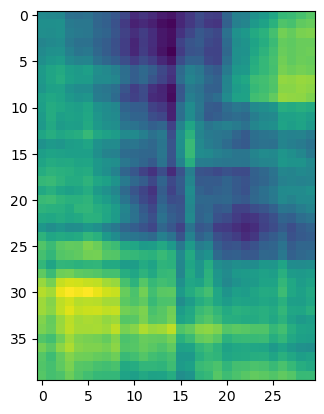

In [31]:
import scipy.signal



#matrix sizes
m = 40
n = 30

#define a 2D Gaussian for smoothing
k = int((m+n)/4)
print(k), print(' ')

xx = np.linspace(-3, 3, k)
print(xx), print(' ')

[X,Y] = np.meshgrid(xx, xx)
#print([X,Y]) 

g2d = np.exp(-(X**2 + Y **2)/ (k+8))
print(g2d), print(' ')


#matrix 
A = scipy.signal.convolve2d(np.random.randn(m,n), g2d, 'same')

plt.imshow(A)
plt.show()

<>:18: SyntaxWarning: invalid escape sequence '\S'
<>:27: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\S'
<>:27: SyntaxWarning: invalid escape sequence '\s'
C:\Users\kenny\AppData\Local\Temp\ipykernel_25460\3899470397.py:18: SyntaxWarning: invalid escape sequence '\S'
  plt.title('$\Sigma$')
C:\Users\kenny\AppData\Local\Temp\ipykernel_25460\3899470397.py:27: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('$\sigma$')


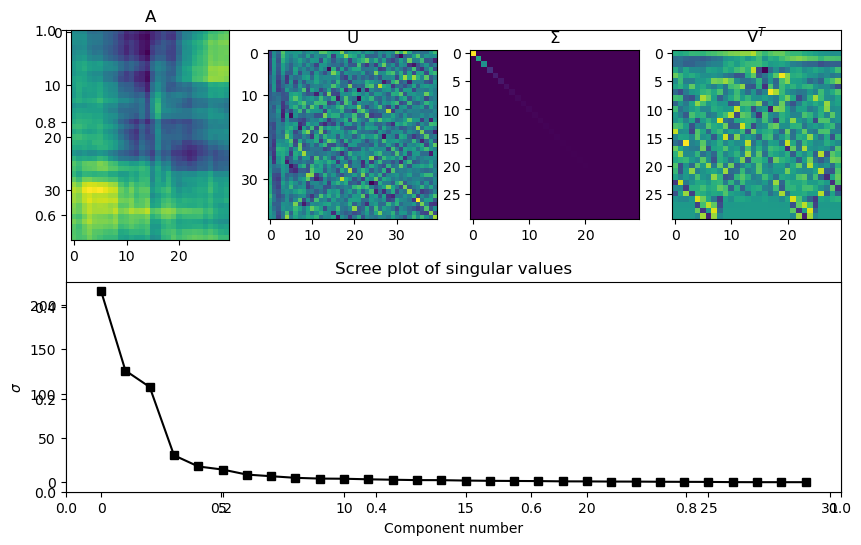

In [32]:
#SVD (remember that V comes out transposed)

U, S, V = np.linalg.svd(A)

#show the constituent matrices
fig = plt.subplots(1, figsize=(10,6))

plt.subplot(241)
plt.imshow(A)
plt.title('A')

plt.subplot(242)
plt.imshow(U)
plt.title('U')

plt.subplot(243)
plt.imshow(np.diag(S))
plt.title('$\Sigma$')

plt.subplot(244)
plt.imshow(V)
plt.title('V$^T$')

plt.subplot(212)
plt.plot(S, 'ks-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$')
plt.title('Scree plot of singular values')

plt.show()

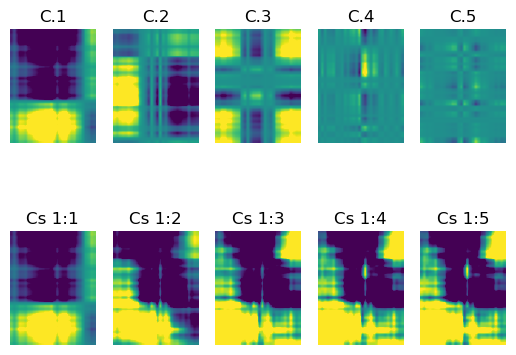

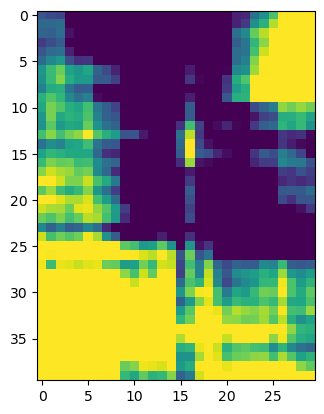

In [33]:
rank1mats = np.zeros((5,m,n))

for i in range(0,5):
    
    # create rank1 matrix
    rank1mats[i,:,:] = np.outer( U[:,i]*S[i],V[i,:] )
    
    plt.subplot2grid((2,5),(0,i))
    plt.imshow(rank1mats[i,:,:],vmin=-5,vmax=5)
    plt.axis('off')
    plt.title('C.%d' %(i+1))
    
    plt.subplot2grid((2,5),(1,i))
    imdat = np.sum(rank1mats[:i+1,:,:],axis=0)
    plt.imshow(imdat,vmin=-5,vmax=5)
    plt.axis('off')
    plt.title('Cs 1:%d' %(i+1))

plt.show()

# then show the original
plt.imshow(A,vmin=-5,vmax=5)
plt.show()

## Low Rank Approximations
Don't change the size, just change the rank

# $$ A_{m,n} = U_{m,n} \Sigma_{k,k} V^T_{k,n} $$

In [35]:
#number of components (singular "layers") to keep
nComps = 5

#reduced matrices
Ur = U[:,0:nComps]
Sr = S[0:nComps]
Vr = V[0:nComps,:]

#Low rank approximation
reconImage = Ur@np.diag(Sr)@Vr

#rank (confirm same as nComps)
print('rank = ', np.linalg.matrix_rank(A)), print(' ')
print('rank = ', np.linalg.matrix_rank(reconImage))

rank =  30
 
rank =  5


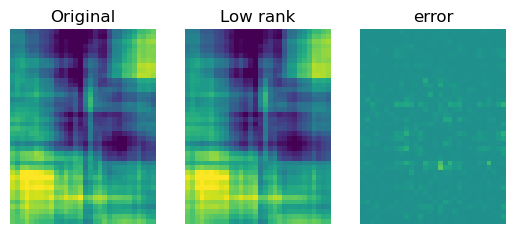

In [36]:
#error map and percet difference from original matrix
errormap = (reconImage-A)**2

#show the results
plt.subplot(131)
plt.imshow(A, vmin=-15, vmax = 15)
plt.axis('off')
plt.title('Original')

plt.subplot(132)
plt.imshow(reconImage, vmin=-15, vmax = 15)
plt.axis('off')
plt.title('Low rank')

plt.subplot(133)
plt.imshow(errormap, vmin=-15, vmax = 15)
plt.axis('off')
plt.title('error')

plt.show()

## Percent Variance
# $$ \pitchfork A = U (\pitchfork \Sigma) V^T $$

In [38]:

#matrix sizes
m = 40
n = 30

#define a 2D Gaussian for smoothing
k = int((m+n)/4)
#print(k), print(' ')

xx = np.linspace(-3, 3, k)
#print(xx), print(' ')

[X,Y] = np.meshgrid(xx, xx)
#print([X,Y]) 

g2d = np.exp(-(X**2 + Y **2)/ (k+8))
#print(g2d), print(' ')


#matrix 
A = scipy.signal.convolve2d(np.random.randn(m,n), g2d, 'same')


<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\s'
C:\Users\kenny\AppData\Local\Temp\ipykernel_25460\4066611895.py:15: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('$\sigma$')
C:\Users\kenny\AppData\Local\Temp\ipykernel_25460\4066611895.py:21: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('$\sigma$ (% of total)')


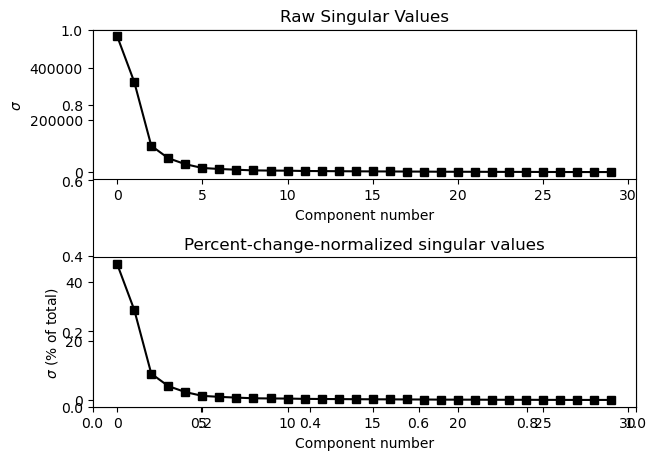

In [39]:
Ascaled = A*1345

# SVD 
U, s, V = np.linalg.svd(Ascaled)

# convert to percent variance
spct = 100*s/np.sum(s)

#plot the singular  values for comparison
fig = plt.subplots(1, figsize=(7,5))

plt.subplot(211)
plt.plot(s, 'ks-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$')
plt.title('Raw Singular Values')

plt.subplot(212)
plt.plot(spct, 'ks-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$ (% of total)')
plt.title('Percent-change-normalized singular values')

plt.tight_layout()
plt.show()

## Challenge

In [41]:
#generate a metrix such that U*V' is valid
A = np.random.randn(5, 5)

#full svd (variables Us, Ss, Vs)
U, S, V = np.linalg.svd(A)

print(f"Singular Values Decomposition of A: \n U: {U} \n \n S: {S} \n \n V: {V}"), print(' ')

#norm of U norm of V 
print(f"Norm of U: \n {np.linalg.norm(U,2)}"), print(' ')
print(f"Norm of V: \n {np.linalg.norm(V,2)}"), print(' ')

#norm of U@V
print(f"Norm of U@V: \n {np.linalg.norm(U@V, 2)}"), print(' ')

Singular Values Decomposition of A: 
 U: [[-0.48743591 -0.47633814  0.63720029  0.34915718 -0.08702451]
 [ 0.27043745 -0.66996411 -0.1389543  -0.41606845 -0.53440661]
 [ 0.80407396  0.00454096  0.55851292  0.14509134  0.14302542]
 [ 0.19099751 -0.05132079 -0.39120963  0.81742714 -0.37370313]
 [ 0.07908752 -0.56709401 -0.33118853  0.12544992  0.73940924]] 
 
 S: [3.56428586 2.8112988  1.32779801 0.40982837 0.16747214] 
 
 V: [[-5.30482539e-01  5.87183770e-01 -3.28748167e-01  4.60589216e-01
  -2.31485881e-01]
 [ 5.33607435e-02  1.32383289e-01  7.70282466e-01  5.68607820e-01
   2.50952917e-01]
 [-1.68264966e-01  5.94821580e-01  4.10902733e-01 -6.69746878e-01
  -2.17313723e-02]
 [ 2.16505197e-01  3.34081024e-01 -3.49188598e-01  5.54660084e-04
   8.48282020e-01]
 [-8.00345743e-01 -4.15050650e-01  8.84072011e-02 -1.26418088e-01
   4.04205744e-01]]
 
Norm of U: 
 1.0000000000000002
 
Norm of V: 
 1.0000000000000007
 
Norm of U@V: 
 1.0000000000000004
 


(None, None)

In [42]:
print(f"U@U: \n {np.round(U@U.T, 3)}"), print(' ')
print(f"V'@V: \n {np.round(V.T@V, 3)}"), print(' ')
print(f"U@V: \n {np.round(U@V, 3)}"), print(' ')

C = U@V
print(np.round(C@C.T, 3))

U@U: 
 [[ 1. -0.  0. -0. -0.]
 [-0.  1. -0.  0. -0.]
 [ 0. -0.  1. -0.  0.]
 [-0.  0. -0.  1.  0.]
 [-0. -0.  0.  0.  1.]]
 
V'@V: 
 [[ 1.  0. -0.  0. -0.]
 [ 0.  1.  0. -0. -0.]
 [-0.  0.  1. -0. -0.]
 [ 0. -0. -0.  1.  0.]
 [-0. -0. -0.  0.  1.]]
 
U@V: 
 [[ 0.271  0.183 -0.074 -0.911  0.24 ]
 [ 0.182  0.07  -0.564 -0.096 -0.797]
 [-0.603  0.794 -0.069 -0.019 -0.016]
 [ 0.438  0.301 -0.582  0.368  0.494]
 [-0.581 -0.491 -0.577 -0.158  0.252]]
 
[[ 1. -0.  0. -0. -0.]
 [-0.  1.  0. -0. -0.]
 [ 0.  0.  1. -0. -0.]
 [-0. -0. -0.  1.  0.]
 [-0. -0. -0.  0.  1.]]


## Pseudoinverse and matrix inverse

In [44]:
#matrix

A = [[1,2,3],
    [1,2,4],
    [1,2,5]]

#full svd (variables Us, Ss, Vs)
U, S, V = np.linalg.svd(A)

#pseudoinvert S
nonzeroels =- S>10**-14 #find nonzero elements (>rounding errors)
S[nonzeroels] = 1/S[nonzeroels] #invert only those elements

#now pseudoinvert A
Ai = V.T@np.diag(S)@U.T

#its sort of close to I...?
print(Ai@A), print(' ')

#compute with pinv function
print(np.linalg.pinv(A)@A)

[[ 3.  6. 12.]
 [ 6. 12. 24.]
 [12. 24. 50.]]
 
[[ 2.00000000e-01  4.00000000e-01  0.00000000e+00]
 [ 4.00000000e-01  8.00000000e-01  0.00000000e+00]
 [-5.55111512e-17 -1.11022302e-16  1.00000000e+00]]


## Condition number of a matrix

<>:37: SyntaxWarning: invalid escape sequence '\s'
<>:37: SyntaxWarning: invalid escape sequence '\s'
C:\Users\kenny\AppData\Local\Temp\ipykernel_25460\1160333523.py:37: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('$\sigma$')


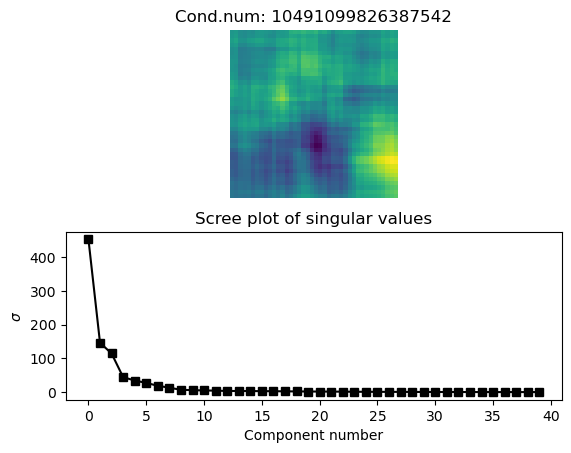

In [46]:
m = 40

#define a 2D Gaussian for smoothing
k = int((m+n)/4)
#print(k), print(' ')

xx = np.linspace(-3, 3, k)
#print(xx), print(' ')

[X,Y] = np.meshgrid(xx, xx)
#print([X,Y]) 

g2d = np.exp(-(X**2 + Y **2)/ (k+8))
#print(g2d), print(' ')

#matrix 
A = np.random.randn(m,m)
A = scipy.signal.convolve2d(np.random.randn(m,m), g2d, 'same')

#SVD
S = np.linalg.svd(A)[1]


#compute condition number
condnum = S[0]/S[-1]

#show the matrix

plt.subplot(211)
plt.imshow(A)
plt.axis('off')
plt.title('Cond.num: %d' %condnum)

plt.subplot(212)
plt.plot(S, 'ks-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$')
plt.title('Scree plot of singular values')

plt.show()

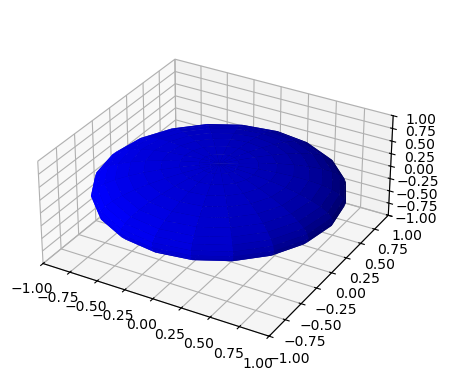

In [47]:
## sphere

# the transformation matrix T
T = np.eye(3)
T[-1,-1] = .5


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Make data
n = 21
u = np.linspace(0, 2*np.pi,n)
v = np.linspace(0, np.pi,n)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

# put coords in a matrix to be transformed
M = np.concatenate( (np.reshape(x,(n*n,1)),np.reshape(y,(n*n,1)),np.reshape(z,(n*n,1))) ,axis=1)

# apply the transformation matrix to the coordinates
TM = T@M.T

# get out the new coordinates
xp = np.reshape(TM[0,:],(n,n))
yp = np.reshape(TM[1,:],(n,n))
zp = np.reshape(TM[2,:],(n,n))

# Plot the surface
ax.plot_surface(xp,yp,zp, color='b')
ax.axis('square')
ax.set_xlim3d(-1,1)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(-1,1)

plt.show()

## challenge 

In [59]:
#  create a random matrix with a specified condition number

m = 6
n = 16

condnum = 41.99

#create signular vectors matrices
U, junk = np.linalg.qr(np.random.randn(m,m))
V, junk = np.linalg.qr(np.random.randn(n,n))

s = np.linspace(condnum, 1, np.min([m,n]))
S = np.zeros((m, n))

for i in range(len(s)):
    S[i,i] = s[i]

#Create A
A = U@S@V.T
condnum = np.linalg.cond(A)
print(condnum)

41.98999999999993


<>:11: SyntaxWarning: invalid escape sequence '\S'
<>:11: SyntaxWarning: invalid escape sequence '\S'
C:\Users\kenny\AppData\Local\Temp\ipykernel_25460\2721887512.py:11: SyntaxWarning: invalid escape sequence '\S'
  plt.title('$\Sigma$')


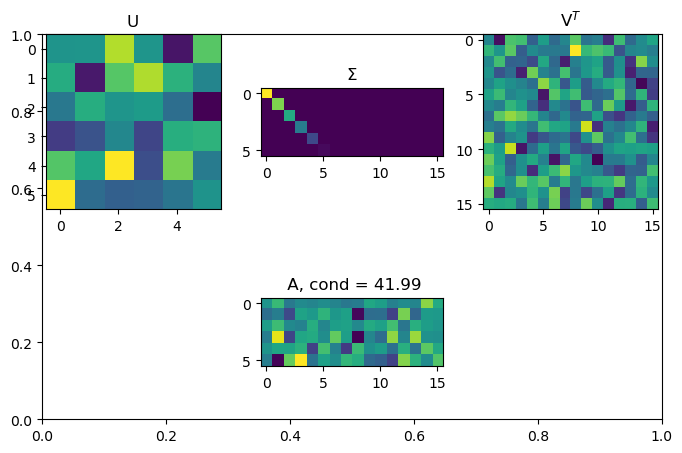

In [65]:
#show the matrix

fig = plt.subplots(1, figsize = (8,5))

plt.subplot(231)
plt.imshow(U)
plt.title('U')

plt.subplot(232)
plt.imshow(S)
plt.title('$\Sigma$')

plt.subplot(233)
plt.imshow(V.T)
plt.title('V$^T$')

plt.subplot(235)
plt.imshow(A)
plt.title(' A, cond = %g'%condnum)

plt.show()


## Challenge

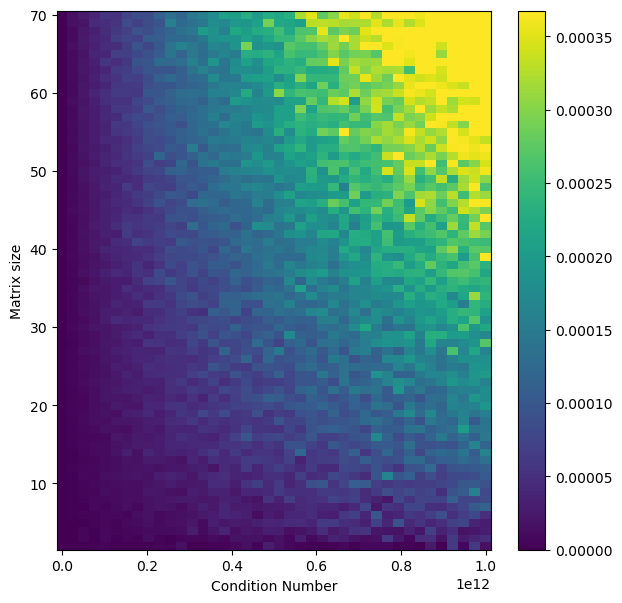

In [72]:
# matrix sizes 
matrixSizes=np.arange(2, 71)

#Condition number
condnums = np.linspace(10, 1e12, 40)

invDiffs = np.zeros((len(matrixSizes), len(condnums)))

for mi, M in enumerate(matrixSizes):
    for ci, C in enumerate(condnums):
        #Create A
        U = np.linalg.qr(np. random.randn(M,M))[0]
        V = np.linalg.qr(np.random.randn(M,M))[0]
        S = np.diag(np.linspace(C, 1, M))
        A= U@S@V
        #compute difference from identity matrix
        I = A@np.linalg.inv(A)
        Idiff = np.abs(I-np.eye(M))
        #norm of the matrix
        invDiffs[mi, ci] = np.linalg.norm(Idiff)

#visualize
fig = plt.figure(figsize=(7,7))
plt.pcolor(condnums, matrixSizes, invDiffs, vmax = np.max(invDiffs)*.6)
plt.xlabel('Condition Number')
plt.ylabel('Matrix size')
plt.colorbar()

plt.show()

